In [1]:
#import the necessary modules
import csv
import pandas as pd
import pathlib as Path
import timeit
import math
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
#import the original csv and convert it into a dataframe
orig_data = pd.read_csv("Resources/data.csv")
display(orig_data.head())
display(orig_data.tail())

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaN


,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
923154,for_sale,445000.0,1.0,2.0,0.99,"1008 King St, Chappaqua, NY, 10514",1008 King St,Chappaqua,New York,10514.0,1052.0,2011-05-09
923155,for_sale,418000.0,4.0,2.0,0.40,"3 Elmwood Dr, Monroe, NY, 10950",3 Elmwood Dr,Monroe,New York,10950.0,1650.0,2015-07-21
923156,for_sale,469000.0,4.0,2.0,0.18,"13 N Conger Ave, Congers, NY, 10920",13 N Conger Ave,Congers,New York,10920.0,2123.0,NaN
923157,for_sale,825000.0,5.0,5.0,0.79,"7 Miller Rd, Valley Cottage, NY, 10989",7 Miller Rd,Valley Cottage,New York,10989.0,3775.0,2010-06-02
923158,for_sale,88000.0,NaN,NaN,35.00,"D18 Half Moon Bay Dr, Croton On Hudson, NY, 10520",D18 Half Moon Bay Dr,Croton On Hudson,New York,10520.0,780.0,NaN


In [8]:
#drop the unnecessary columns
def drop_columns(df, columns_to_drop):
    df_drop = df.drop(columns=columns_to_drop)
    return df_drop

In [9]:
columns_to_drop = ["status", "full_address", "street", "city", "sold_date"]

In [10]:
df_drop = drop_columns(orig_data, columns_to_drop)


In [11]:
df_drop

,price,bed,bath,acre_lot,state,zip_code,house_size
0,105000.0,3.0,2.0,0.12,Puerto Rico,601.0,920.0
1,80000.0,4.0,2.0,0.08,Puerto Rico,601.0,1527.0
2,67000.0,2.0,1.0,0.15,Puerto Rico,795.0,748.0
3,145000.0,4.0,2.0,0.10,Puerto Rico,731.0,1800.0
4,65000.0,6.0,2.0,0.05,Puerto Rico,680.0,NaN
...,...,...,...,...,...,...,...
923154,445000.0,1.0,2.0,0.99,New York,10514.0,1052.0
923155,418000.0,4.0,2.0,0.40,New York,10950.0,1650.0
923156,469000.0,4.0,2.0,0.18,New York,10920.0,2123.0
923157,825000.0,5.0,5.0,0.79,New York,10989.0,3775.0


In [12]:
#group the dataframe by column
def groupby_state(df,groupby_column):
    df_group = df.groupby(by = groupby_column)
    return df_group

In [13]:
#set groupby column to state column
groupby_column = "state"

In [14]:
#group the dataframe by "state" column
df_group = groupby_state(df_drop,groupby_column)


In [15]:
df_group

In [16]:
#filter out the data by specific column value 
def filter_by_state(df, column_to_filter, state_name):
    df_new = df[(df[column_to_filter] == state_name)]
    return df_new

In [17]:
#set column to filter out as state
column_to_filter="state"

In [18]:
#set state name to Puerto Rico
state_name = "Virgin Islands"

In [19]:
#filter out Puerto Rico df
df_new = filter_by_state(df_drop, column_to_filter, state_name)


In [20]:
#function to rename column
#def rename_column(df, column_name, new_column_name):
   # df = df.rename(columns={column_name: new_column_name})
   # return df

In [21]:
#set column name
#column_name = "zip_code"

In [22]:
#set new column name
#new_column_name = "zipcode1"

In [23]:
#rename zip_code coloumn
#PRdata2 = rename_column(PR_data, column_name, new_column_name)
#PRdata2

In [24]:
#set column to drop as state
columns_to_drop =["state"]

In [25]:
#drop state column on the Puerto Rico df
new_data2 = drop_columns(df_new, columns_to_drop)


In [26]:
#reformat zipcode
def zip_code_format(df):
    zipdf = df.zip_code
    zipdf2 = zipdf.apply('{:0>7}'.format)
    dfzip = pd.DataFrame(zipdf2)
    return dfzip

In [27]:
#reformat VI zipcode column
VIzipdf = zip_code_format(df_new)
VIzipdf

,zip_code
10334,00802.0
10335,00802.0
10336,00802.0
10337,00802.0
10338,00802.0
...,...
17994,00820.0
17995,00820.0
17996,00820.0
17997,00820.0


In [29]:
#function to drop decimals from a string
def drop_decimals(string_value):
    split_string = string_value.split(".")
    new_string = split_string[0]
    return new_string

#apply the function to the column of string values
VIzipdf["zip_code"] = VIzipdf["zip_code"].apply(drop_decimals)

#convert the array to df
dfVIzipfinal = pd.DataFrame(VIzipdf)
dfVIzipfinal

,zip_code
10334,00802
10335,00802
10336,00802
10337,00802
10338,00802
...,...
17994,00820
17995,00820
17996,00820
17997,00820


In [30]:
#drop zip_code column
new_data3 = drop_columns(new_data2, "zip_code")

In [60]:
#concatenate two dfs side by side
def concat_df(df1, df2):
    concatenated_data = pd.concat([df1, df2], axis=1)
    return concatenated_data

In [33]:
#concatenate the zipcode modified df and old df side by side
concatenated_data = concat_df(new_data3, VIzipdf)

In [34]:
concatenated_data

,price,bed,bath,acre_lot,house_size,zip_code
10334,175000.0,5.0,2.0,0.21,1140.0,00802
10335,100000.0,9.0,5.0,0.04,3120.0,00802
10336,1599000.0,4.0,6.0,1.04,6760.0,00802
10337,115000.0,NaN,1.0,NaN,235.0,00802
10338,925000.0,3.0,5.0,0.81,4500.0,00802
...,...,...,...,...,...,...
17994,1850000.0,NaN,NaN,15.66,NaN,00820
17995,250000.0,NaN,NaN,0.91,NaN,00820
17996,1295000.0,NaN,NaN,14.00,NaN,00820
17997,1200000.0,NaN,NaN,0.52,NaN,00820


In [35]:
#function to fill na values with median values for each desired column by grouping by one column
def fill_na_with_median(df, groupby_column, column_names):
    df[column_names] = df.groupby(groupby_column)[column_names].transform(lambda x: x.fillna(x.median()))
    return df

In [36]:
groupby_column = "zip_code"

In [37]:
column_names = ["bed", "bath", "acre_lot", "house_size"]

In [38]:
#fill na values with median values for bed, bath, acre_lot, house_size by grouping by zip_code
fillna_df = fill_na_with_median(concatenated_data, groupby_column, column_names)

In [39]:
fillna_df

,price,bed,bath,acre_lot,house_size,zip_code
10334,175000.0,5.0,2.0,0.21,1140.0,00802
10335,100000.0,9.0,5.0,0.04,3120.0,00802
10336,1599000.0,4.0,6.0,1.04,6760.0,00802
10337,115000.0,4.0,1.0,0.73,235.0,00802
10338,925000.0,3.0,5.0,0.81,4500.0,00802
...,...,...,...,...,...,...
17994,1850000.0,3.0,3.0,15.66,2290.0,00820
17995,250000.0,3.0,3.0,0.91,2290.0,00820
17996,1295000.0,3.0,3.0,14.00,2290.0,00820
17997,1200000.0,3.0,3.0,0.52,2290.0,00820


In [40]:
#function to drop na values in a df
def drop_na(df):
    df_no_na = df.dropna()
    return df_no_na

In [41]:
#drop na values in the df
df_no_na = drop_na(fillna_df)

In [42]:
def na_count_sum(df):
    na_count = df.isna().sum()
    return na_count

In [43]:
#check for na values in df
na_count_sum(df_no_na)

price         0
bed           0
bath          0
acre_lot      0
house_size    0
zip_code      0
dtype: int64

<AxesSubplot:xlabel='bed', ylabel='price'>

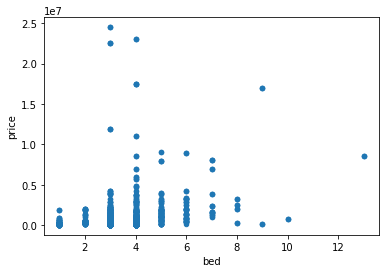

In [44]:
#plot bed vs price to find outliers
df_no_na.plot.scatter(x='bed', y='price')

<AxesSubplot:xlabel='bath', ylabel='price'>

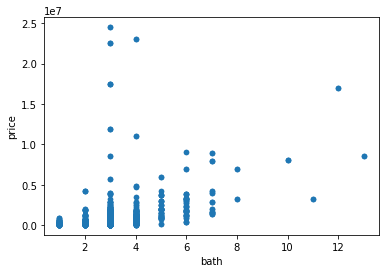

In [45]:
#plote bath vs price to find outliers
df_no_na.plot.scatter(x='bath', y='price')

In [46]:
#function to drop outliers
def drop_outlier(df, column_name, value):
    df_no_outliers = df.drop(df[df[column_name] > value ].index)
    return df_no_outliers

In [47]:
#drop bed outliers that skew the data
df_no_outliers = drop_outlier(df_no_na, "bed", 6)

In [48]:
df_no_outliers

,price,bed,bath,acre_lot,house_size,zip_code
10334,175000.0,5.0,2.0,0.21,1140.0,00802
10336,1599000.0,4.0,6.0,1.04,6760.0,00802
10337,115000.0,4.0,1.0,0.73,235.0,00802
10338,925000.0,3.0,5.0,0.81,4500.0,00802
10339,265000.0,2.0,2.0,0.73,1152.0,00802
...,...,...,...,...,...,...
17994,1850000.0,3.0,3.0,15.66,2290.0,00820
17995,250000.0,3.0,3.0,0.91,2290.0,00820
17996,1295000.0,3.0,3.0,14.00,2290.0,00820
17997,1200000.0,3.0,3.0,0.52,2290.0,00820


In [61]:
#drop bath outliers that skew the data
df_no_outliers2 = drop_outlier(df_no_outliers, "bath", 5)

In [62]:
df_no_outliers2

,price,bed,bath,acre_lot,house_size,zip_code
10334,175000.0,5.0,2.0,0.21,1140.0,00802
10337,115000.0,4.0,1.0,0.73,235.0,00802
10338,925000.0,3.0,5.0,0.81,4500.0,00802
10339,265000.0,2.0,2.0,0.73,1152.0,00802
10340,115500.0,4.0,4.0,0.50,3060.0,00802
...,...,...,...,...,...,...
17994,1850000.0,3.0,3.0,15.66,2290.0,00820
17995,250000.0,3.0,3.0,0.91,2290.0,00820
17996,1295000.0,3.0,3.0,14.00,2290.0,00820
17997,1200000.0,3.0,3.0,0.52,2290.0,00820


In [63]:
#drop the zipcode nan value in data
df_no_outliers3 = df_no_outliers2.drop(df_no_outliers2[df_no_outliers2['zip_code'] == "0000nan"].index)

In [64]:
df_no_outliers3

,price,bed,bath,acre_lot,house_size,zip_code
10334,175000.0,5.0,2.0,0.21,1140.0,00802
10337,115000.0,4.0,1.0,0.73,235.0,00802
10338,925000.0,3.0,5.0,0.81,4500.0,00802
10339,265000.0,2.0,2.0,0.73,1152.0,00802
10340,115500.0,4.0,4.0,0.50,3060.0,00802
...,...,...,...,...,...,...
17993,249000.0,1.0,1.0,0.86,770.0,00820
17994,1850000.0,3.0,3.0,15.66,2290.0,00820
17995,250000.0,3.0,3.0,0.91,2290.0,00820
17996,1295000.0,3.0,3.0,14.00,2290.0,00820


In [65]:
#drop duplicate values function
def drop_duplicates(df):
    df_no_duplicates = df.drop_duplicates()
    return df_no_duplicates

In [66]:
#drop duplicate values from df
df_no_duplicates = drop_duplicates(df_no_outliers3)

In [67]:
df_no_duplicates

,price,bed,bath,acre_lot,house_size,zip_code
10334,175000.0,5.0,2.0,0.21,1140.0,00802
10337,115000.0,4.0,1.0,0.73,235.0,00802
10338,925000.0,3.0,5.0,0.81,4500.0,00802
10339,265000.0,2.0,2.0,0.73,1152.0,00802
10340,115500.0,4.0,4.0,0.50,3060.0,00802
...,...,...,...,...,...,...
17573,250000.0,4.0,4.0,0.65,4400.0,00830
17574,425000.0,4.0,4.0,0.45,4400.0,00830
17575,675000.0,4.0,4.0,0.67,4400.0,00830
17578,515000.0,4.0,4.0,0.50,4400.0,00830


In [69]:
#convert df to csv file
VIzipdatafinalcsv = df_no_duplicates.to_csv('FINAL_VI_DATA5.csv', index=False)
VIzipdatafinalcsv